In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

1. Introduction to Matplotlib

In [123]:
def make_sine_wave(x, A, w):
    y = A * np.sin(w * x)
    return y

In [125]:
x = np.linspace(0, 2*np.pi, 1000)

In [127]:
A = np.array([0.5, 1, 1.5, 2, 2.5])
w = np.array([1, 2, 3, 4, 5])

In [129]:
plt.figure(figsize = (3, 3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [131]:
zipped = zip(A, w)

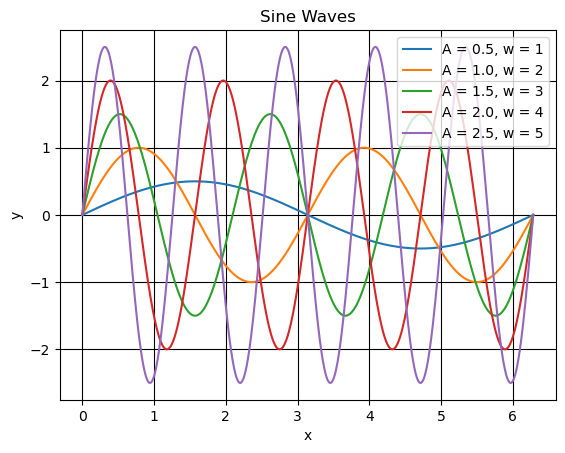

In [133]:
for A, w in zipped:
    plt.plot(x, make_sine_wave(x, A, w), label = f"A = {A}, w = {w}")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine Waves")
plt.grid(color = "k")
plt.show()

2. Data with Pandas

i. Load

In [141]:
df = pandas.read_csv('~/python_decal/jordan_decal/homework8/stars.csv')

ii. Print

In [145]:
df.iloc[0:5]

,Name,Distance (ly),Mass (M☉),Radius (R☉),Temperature (K),Spectral_Type
0,Proxima Centauri,4.24,0.12,0.14,3042,M5.5Ve
1,Alpha Centauri A,4.37,1.10,1.22,5790,G2V
2,Alpha Centauri B,4.37,0.91,0.86,5260,K1V
3,Barnard's Star,5.96,0.16,0.20,3134,M4Ve
4,Wolf 359,7.86,0.09,0.16,2800,M6.5Ve


In [147]:
rows, cols = np.shape(df)

In [149]:
rows

10

In [151]:
cols

6

In [211]:
col1 = df.loc[0, 'Name']
type(col1)

str

In [193]:
col2 = df.loc[1, "Distance (ly)"]
type(col2)

numpy.float64

In [195]:
col3 = df.iloc[0, 2]
type(col3)

numpy.float64

In [197]:
col4 = df.iloc[0, 3]
type(col4)

numpy.float64

In [199]:
col5 = df.iloc[0, 4]
type(col5)

numpy.int64

In [201]:
col6 = df.iloc[0, 5]
type(col6)

str

iii. Calculate

In [228]:
Average_Mass = np.mean(df['Mass (M☉)'])
Average_Mass

0.579

In [232]:
Average_Temp = np.mean(df['Temperature (K)'])
Average_Temp

6370.6

In [262]:
Largest_R = np.max(df['Radius (R☉)'])
def Biggest_Star():
    return df.loc[df['Radius (R☉)'] == Largest_R, 'Name'].values[0]

print(Biggest_Star())

Sirius A


df.loc function takes in arguments (conditional, column) i.e. df.loc[df['shield'] > 6, ['max_speed']] and it will print the element from the max_speed column that satisfies the condition that shield of that row is > 6. The .values[0] gives us the Numpy array for this .loc and only gives us the first value, which is the name Sirius A. If that part weren't there then we would also get the row number (5) and some other things below.

In [265]:
def Biggest_Star():
    return df.loc[df['Radius (R☉)'] == Largest_R, 'Name']

print(Biggest_Star())

5    Sirius A
Name: Name, dtype: object


In [275]:
M_types = df[df['Spectral_Type'].str.startswith('M')]
rows2, cols2 = np.shape(M_types) #get the shape of our new data frame that only has M type stars. Avoid repeating variable names by putting 2.
Number_of_Mtypes = rows2
Number_of_Mtypes

6

In [283]:
Sorted_Stars = df.sort_values('Distance (ly)', ascending = True)
Three_closest = Sorted_Stars[0:3]
Three_closest

,Name,Distance (ly),Mass (M☉),Radius (R☉),Temperature (K),Spectral_Type
0,Proxima Centauri,4.24,0.12,0.14,3042,M5.5Ve
1,Alpha Centauri A,4.37,1.10,1.22,5790,G2V
2,Alpha Centauri B,4.37,0.91,0.86,5260,K1V


In [285]:
M_types.to_csv('m_type_stars.csv')

3. Seaborn!

In [5]:
penguins = sns.load_dataset("penguins")

In [7]:
print(penguins)


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

Text(0.5, 1.0, 'Body Mass Distribution of Penguin Species')

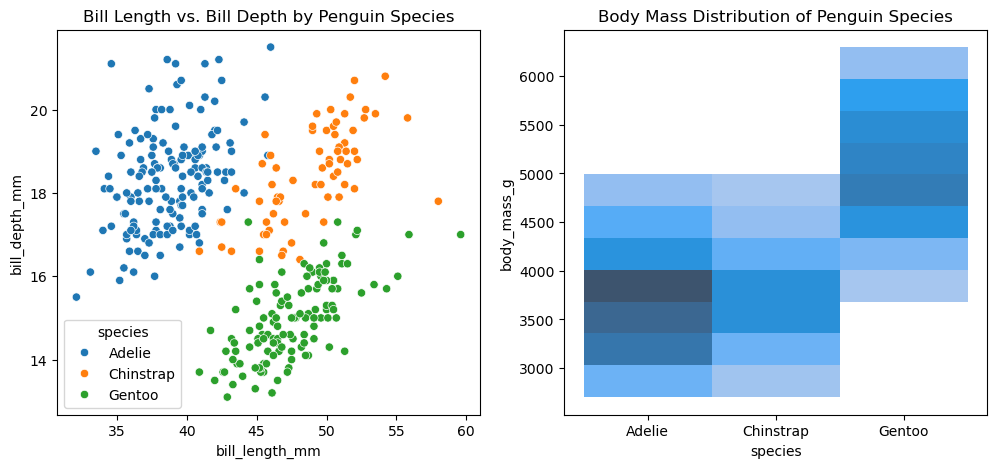

In [39]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', legend = 'auto', ax = axs[0], hue = 'species')
axs[0].set_title('Bill Length vs. Bill Depth by Penguin Species')
sns.histplot(data = penguins, x = 'species', y = 'body_mass_g', ax = axs[1])
axs[1].set_title('Body Mass Distribution of Penguin Species')